In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from make_ddf_survey import generate_ddf_scheduled_obs

In [2]:
# This function loads up visibility info for all the fields,
# then makes a list of desired observations to match a desired cummulative distribution function.
ddf_observations = generate_ddf_scheduled_obs()

Optimizing ELAISS1
Optimizing XMM_LSS
Optimizing ECDFS
Optimizing COSMOS
Optimizing EDFS_a


In [3]:
# Here's what the desired observations look like. Dithering (spatial and rotational) gets added later, but 
# you could include that if you wanted to. Note the flush-by-mjd is 2 days after the desired MJD, so there
# is potential for observations to execute later if they are blocked by weather

# Also note that this list is simple and there are probably 
ddf_observations

array([(0, 0.16493361, -0.76794487, 60225.17708333, 60227.17708333, 30., 'u', 0., 0., 0., 0., 1, 'DD:ELAISS1', 0.01041667, 0.05235988, 0.43633231, 1.48352986, 3., 21., False,      0),
       (0, 0.16493361, -0.76794487, 60225.17708333, 60227.17708333, 30., 'u', 0., 0., 0., 0., 1, 'DD:ELAISS1', 0.01041667, 0.05235988, 0.43633231, 1.48352986, 3., 21., False,      1),
       (0, 0.16493361, -0.76794487, 60225.17708333, 60227.17708333, 30., 'u', 0., 0., 0., 0., 1, 'DD:ELAISS1', 0.01041667, 0.05235988, 0.43633231, 1.48352986, 3., 21., False,      2),
       ...,
       (0, 1.1100294 , -0.83077672, 63868.34374915, 63870.34374915, 30., 'y', 0., 0., 0., 0., 2, 'DD:EDFS_b', 0.01041667, 0.05235988, 0.43633231, 1.48352986, 3., 21., False, 194581),
       (0, 1.1100294 , -0.83077672, 63868.34374915, 63870.34374915, 30., 'y', 0., 0., 0., 0., 2, 'DD:EDFS_b', 0.01041667, 0.05235988, 0.43633231, 1.48352986, 3., 21., False, 194582),
       (0, 1.1100294 , -0.83077672, 63868.34374915, 63870.34374915, 30

In [4]:
np.unique(ddf_observations['note'])

array(['DD:COSMOS', 'DD:ECDFS', 'DD:EDFS_a', 'DD:EDFS_b', 'DD:ELAISS1',
       'DD:XMM_LSS'], dtype='<U40')

In [5]:
# So we are listing ~200k potential DDF observations, which would be 10% of the 2 million
# visits we typically get in 10 years, but some of these will be lost to weather and downtime.
# looks like in draft_connected_v2.99_10yrs.db 150590 of them get executed. 
# Around a 77% success rate seems reasonable. 
np.size(ddf_observations['note'])

194584

Text(0, 0.5, 'Cumulative number of observations')

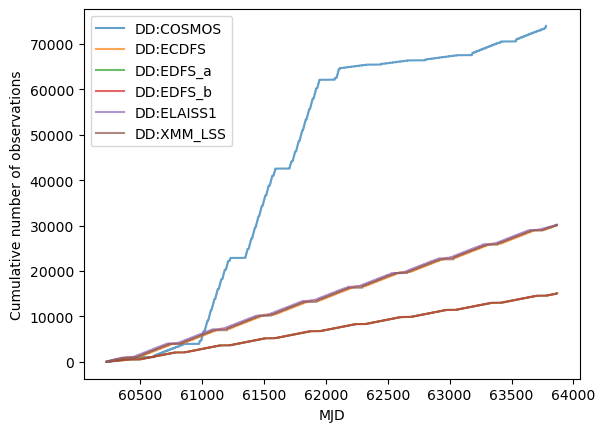

In [6]:
for ddf_name in np.unique(ddf_observations['note']):
    indx = np.where(ddf_observations['note'] == ddf_name)[0]
    n = np.arange(indx.size) + 1
    plt.plot(ddf_observations['mjd'][indx], n, label=ddf_name, alpha=0.7)
plt.legend()
plt.xlabel('MJD')
plt.ylabel('Cumulative number of observations')